<a href="https://colab.research.google.com/github/guyb2022/ML_DS_Training/blob/main/mnist_as_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN Model Intro with Fashion MNIST Implementation


### Implement CNN model in realtime using Fashion MNIST dataset

![](https://pyimagesearch.com/wp-content/uploads/2019/02/fashion_mnist_dataset_sample.png)
<br/>
Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.
The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try.  "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others."

Zalando seeks to replace the original MNIST dataset

### Data Description

* Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total.
* Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. 
* The training and test data sets have 785 columns. 
* The first column consists of the class labels (see above), and represents the article of clothing. 
* The rest of the columns contain the pixel-values of the associated image.

To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix.
For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below. 

#### Labels
Each training and test example is assigned to one of the following labels:

* 0 T-shirt/top 
* 1 Trouser
* 2 Pullover
* 3 Dress
* 4 Coat
* 5 Sandal
* 6 Shirt
* 7 Sneaker
* 8 Bag
* 9 Ankle boot 

#### TL;DR

* Each row is a separate image
* Column 1 is the class label.
* Remaining columns are pixel numbers (784 total).
* Each value is the darkness of the pixel (1 to 255)

### note

* Original dataset was downloaded from https://github.com/zalandoresearch/fashion-mnist

* Dataset was converted to CSV with this script: https://pjreddie.com/projects/mnist-in-csv/

In [ ]:

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Create dataframes for train and test datasets**

In [ ]:
train_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/mnist/dataset/fashion-mnist_train.csv',sep=',')
test_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/mnist/dataset/fashion-mnist_test.csv', sep = ',')

Let us explore the train and test data

In [ ]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now it is observed that the first column is the label data and because it has 10 classes so it is going to have from 0 to 9.The remaining columns are the actual pixel data.Here as you can see there are about 784 columns that contain pixel data.
Here each row is a different image representation in the form pixel data.

Now let us split the train data into x and y arrays where x represents the image data and y represents the labels.

To do that we need to convert the dataframes into numpy arrays of float32 type which is the acceptable form for tensorflow and keras.

In [ ]:
train_data = np.array(train_df, dtype = 'float32')

Similarly let us do the same process for test data

In [ ]:
test_data = np.array(test_df, dtype='float32')

Now let us slice the train arrays into x and y arrays namely x_train,y_train to store all image data and label data respectively.
i.e 

- x_train contains all the rows and all columns except the label column and excluding header info .
- y_train contains all the rows and first column and excluding header info .


Similarly slice the test arrays into x and y arrays namely x_train,y_train to store all image data and label data respectively.
i.e 

- x_test contains all the rows and all columns except the label column and excluding header info .
- y_test contains all the rows and first column and excluding header info .

####  Important Note : Since the image data in x_train and x_test is from 0 to 255 ,  we need to rescale this from 0 to 1.To do this we need to divide the x_train and x_test by 255 . It's important that the training set and the testing set be preprocessed in the same way:

In [ ]:
x_train = train_data[:,1:]/255

y_train = train_data[:,0]

x_test= test_data[:,1:]/255

y_test=test_data[:,0]

Now we are gonna split the training data into validation and actual training data for training the model and testing it using the validation set. This is achieved using the train_test_split method of scikit learn library.

In [ ]:
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state = 12345)

Now let us visualise the some samples after the resize of the data which needs to be ready for train the network .


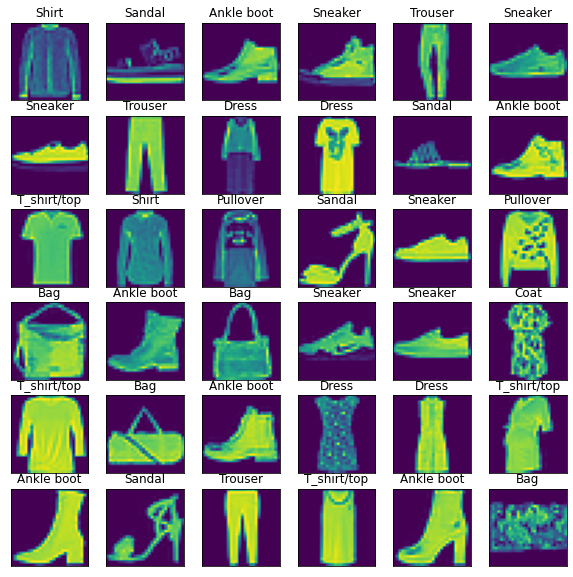

In [ ]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)))
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

Labels
Each training and test example is assigned to one of the following labels as shown below:

* 0 T-shirt/top
* 1 Trouser
* 2 Pullover
* 3 Dress
* 4 Coat
* 5 Sandal
* 6 Shirt
* 7 Sneaker
* 8 Bag
* 9 Ankle boot

I think the best way is to visualise the above 10 types of classes to get a feel of what these items look like :) .So let us visualise


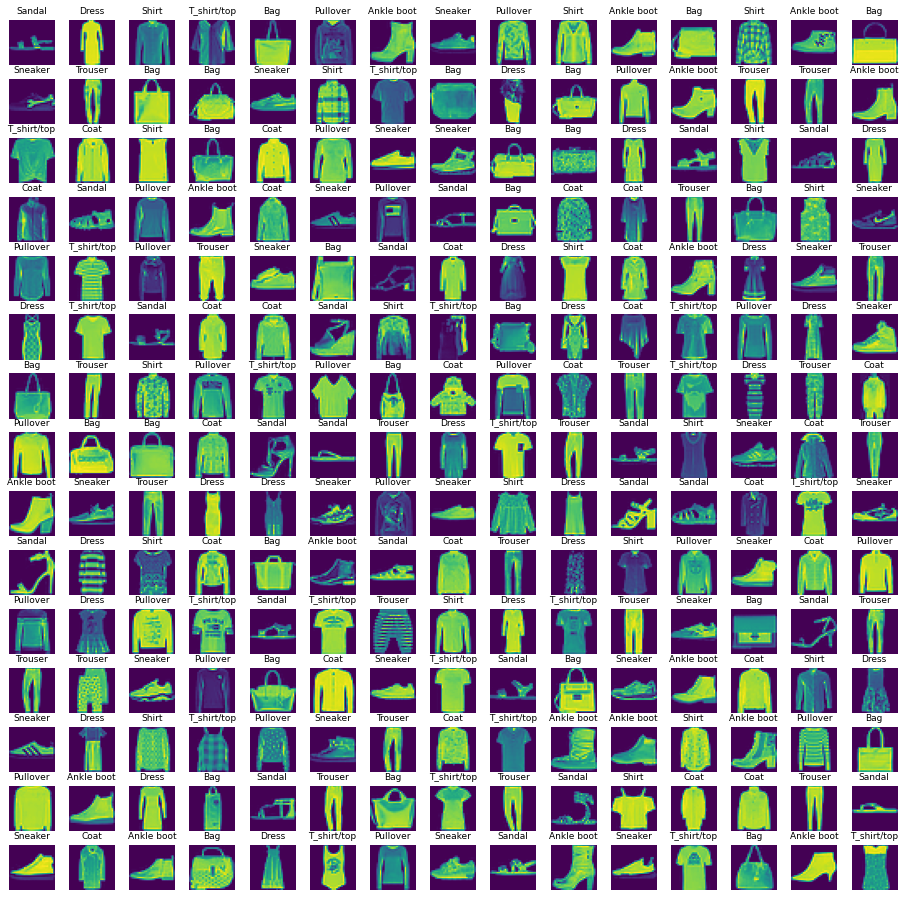

In [ ]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (16,16))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
n_train = len(train_data) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow( train_data[index,1:].reshape((28,28)) )
    labelindex = int(train_data[index,0])
    axes[i].set_title(class_names[labelindex], fontsize = 9)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.3)

### As you can observe above the shape of shoe from the sample image


### First of all let us define the shape of the image before we define the model. Defined the shape of the image as 3d with rows and columns and 1 for the 3d visualisation


In [ ]:
image_rows = 28
image_cols = 28
batch_size = 4096
image_shape = (image_rows,image_cols,1) 

Now we need to do more formating on the x_train,x_test and x_validate sets.

In [ ]:
x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)

In [ ]:
x_train[0].shape

(28, 28, 1)

# Define the model 



In [ ]:
# Building the model
conv_model = tf.keras.models.Sequential([layers.Conv2D(128, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
                                         layers.MaxPooling2D(pool_size=(2, 2)),
                                         layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
                                         layers.MaxPooling2D(pool_size=(2, 2)),
                                         layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
                                         layers.MaxPooling2D(pool_size=(2, 2)),
                                         layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
                                         layers.MaxPooling2D(pool_size=(2, 2)),
                                         layers.Flatten(),
                                         layers.Dense(512, activation='relu'),
                                         layers.Dense(256, activation='relu'),
                                         layers.Dense(10, activation='softmax')
])

## Compile the model



In [ ]:
conv_model.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])
conv_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 32)         0

## Train CNN Model:


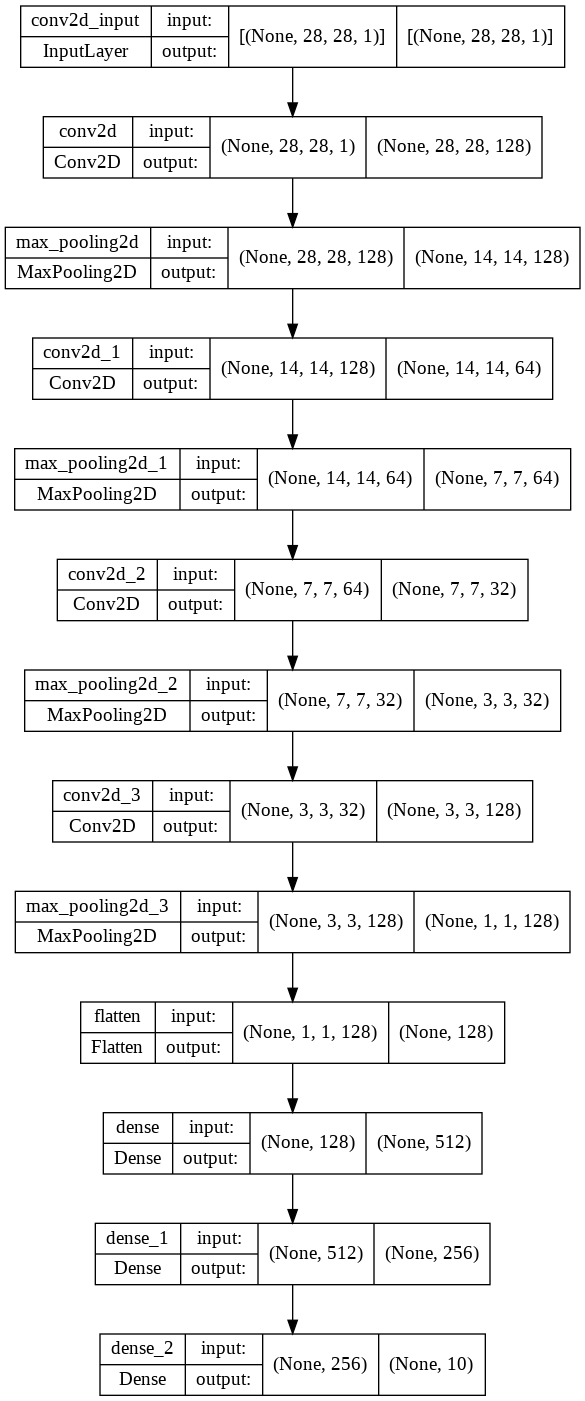

In [ ]:
keras.utils.plot_model(conv_model, 'model_image_classification_shapes.png', show_shapes=True)

# plot the Training Accuracy vs Loss to get a better understanding of the model training.

In [ ]:
training_hist = conv_model.fit(x_train,
                               y_train,
                               epochs=5,
                               batch_size=32,
                               validation_data=(x_validate,y_validate)
                               )

Epoch 1/5
1500/1500 [==============================] - 220s 146ms/step - loss: 0.5200 - accuracy: 0.8066 - val_loss: 0.3316 - val_accuracy: 0.8777
Epoch 2/5
1500/1500 [==============================] - 216s 144ms/step - loss: 0.3224 - accuracy: 0.8837 - val_loss: 0.2875 - val_accuracy: 0.9001
Epoch 3/5
1500/1500 [==============================] - 219s 146ms/step - loss: 0.2678 - accuracy: 0.9041 - val_loss: 0.2483 - val_accuracy: 0.9087
Epoch 4/5
1500/1500 [==============================] - 220s 147ms/step - loss: 0.2383 - accuracy: 0.9125 - val_loss: 0.2731 - val_accuracy: 0.8972
Epoch 5/5
1500/1500 [==============================] - 218s 145ms/step - loss: 0.2160 - accuracy: 0.9208 - val_loss: 0.2433 - val_accuracy: 0.9101


- #### Evaluate /Score the model

In [ ]:
y_pred = conv_model.predict(x_validate)
model_accuracy = conv_model.evaluate(x_validate, y_validate)
print(model_accuracy)

375/375 [==============================] - 12s 31ms/step - loss: 0.2433 - accuracy: 0.9101
[0.24330584704875946, 0.9100833535194397]


# Results




#### plot training and validation accuracy as well as loss.

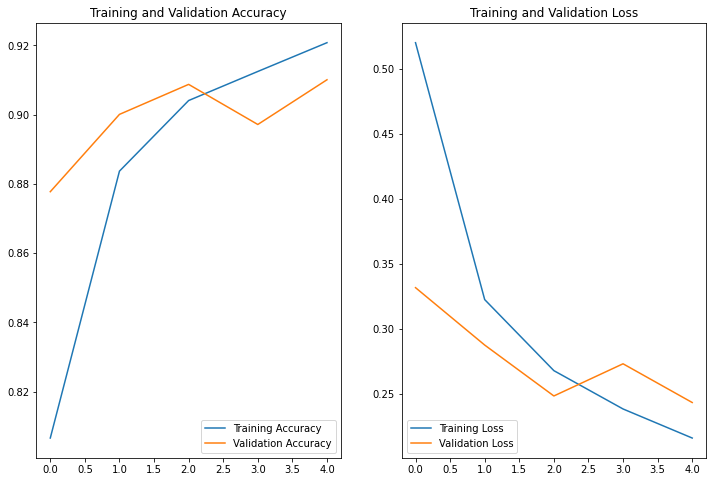

In [ ]:
acc = training_hist.history['accuracy']
val_acc = training_hist.history['val_accuracy']

loss = training_hist.history['loss']
val_loss = training_hist.history['val_loss']

epochs_range = range(5)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='lower left')
plt.title('Training and Validation Loss')
plt.show()

### Classification Report
summarize the performance of your  classifier 